In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import math
import numpy as np 
import copy
import random

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("kmeans_dataset.csv")
df = df.drop("Unnamed: 0", axis=1)
# temp_df = copy.deepcopy(df)
#plt.scatter(df["X"])


## Centroid set

In [4]:
def distance(point1, point2):
    return math.sqrt((point1[0]- point2[0])**2 + (point1[1]- point2[1])**2)

In [5]:
def centriods_changelog(centroids_list, i, centroids_history):
    centroids_history[i]= centroids_list

In [6]:
def centriod_init(k, df):
    centroids_list = []
    randomlist = random.sample(range(0, len(df)), k)
    centroids_list = list(df.iloc[randomlist].values)
    
    down_left = [df.X.min(), df.Y.min()]
    up_right = [df.X.max(), df.Y.max()]

    max_movment =  k *distance(down_left, up_right)

    return centroids_list, max_movment

In [7]:
def assign_centriods(df, centroids_list):
    df['centroid'] = None
    distanse_list = []

    for index, row in df.iterrows():
        temp_distanse_list = np.zeros(len(centroids_list))
        for center_index in range(len(centroids_list)):
            x1, y1 = centroids_list[center_index] 
            distance = math.sqrt((row['X']-x1)**2 + (row['Y']-y1)**2)
            temp_distanse_list[center_index] = -1 * distance
        distanse_list.append(temp_distanse_list.argmax())
    df['centroid'] = distanse_list
    return df


In [8]:
def update_centroids(centroids_list, result_df):
    new_centroids = []
    for centroid_index in range(len(centroids_list)):
        centroid = [0,0]
        centroid[0] = result_df[result_df['centroid'] == centroid_index].X.mean()
        centroid[1] = result_df[result_df['centroid'] == centroid_index].Y.mean()
        new_centroids.append(centroid)

    return new_centroids    

In [9]:
def centroids_analysis(centroids_history):
    centroids_movements_list = []
    for k  in list(centroids_history.keys())[:-1]:
        last_Step = centroids_history[k]
        current_Step = centroids_history[k+1]
        centroids_movements = 0
        for centroid_index in range(len(last_Step)):
           centroids_movements +=  distance(last_Step[centroid_index], current_Step[centroid_index])
        centroids_movements_list.append(centroids_movements)
    return centroids_movements_list

In [10]:
def clusters_check(df, centroids_list):
    
    mean_list = []
    for center_index in range(len(centroids_list)):
        cluster_df = df[df["centroid"] == center_index]
        cluster_df["distance"] = "0"
        distance_list = []
        
        for index , row in cluster_df.iterrows():
            
            x1, y1 = centroids_list[center_index] 
            distance_list.append(math.sqrt((row['X']-x1)**2 + (row['Y']-y1)**2))

        cluster_df["distance"] = distance_list
        mean_list.append(cluster_df["distance"].mean())

    return mean_list

## Kmeans

In [11]:
def plot_cluster(centroids_list, result_df):
    plt.scatter(result_df['X'], result_df["Y"], c=result_df['centroid'])
    plt.scatter(*zip(*centroids_list), c='red', s=100, label='centroids')
    plt.show()


In [12]:
centroids_history = {}

def kmeans (number_of_centroids, df, centroids_history):
    centroids_list, max_movement = centriod_init(number_of_centroids, df)
    temp_df = copy.deepcopy(df)
    currentstep = centroids_list
    index = 0
    centroids_movements = max_movement

    while centroids_movements > (max_movement * 0.5):

        currentstep = centroids_list
        result_df = assign_centriods(temp_df, centroids_list)
        centriods_changelog(centroids_list, index, centroids_history)
        
        
        centroids_list = update_centroids(centroids_list, result_df)
        futurestep = centroids_list
        centroids_movements = 0
        for centroid_index in range(len(currentstep)):
           centroids_movements +=  distance(currentstep[centroid_index], futurestep[centroid_index])
        index += 1
        
       
        
    plot_cluster(centroids_list, result_df)    
    return temp_df, centroids_list
    
    
    

## set Hyperparameter(K)

In [13]:
def set_k(df):

    result_list = []
    for k in range(3, 10):
        centroids_history = {}
        temp_df, centroids_list = kmeans(k, df, centroids_history)
        mean_list = clusters_check(temp_df, centroids_list)

        result_list.append(sum(mean_list)/len(mean_list))

    plt.plot( list(range(3,10)), result_list) 
    plt.savefig("plot.pdf")   

        

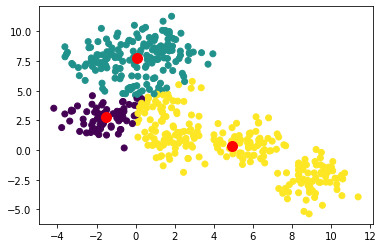

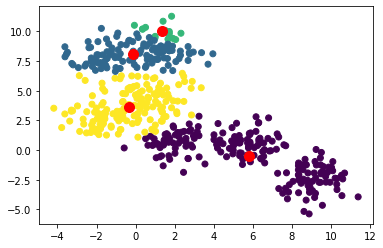

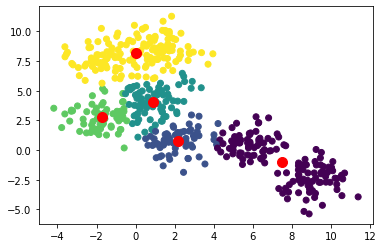

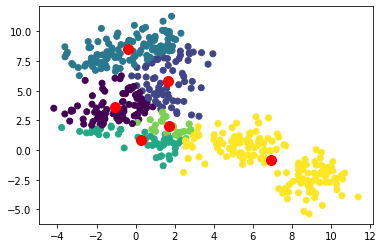

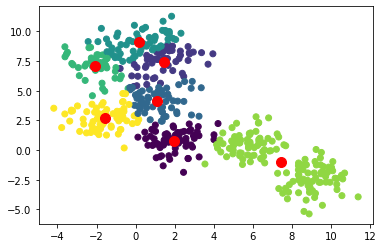

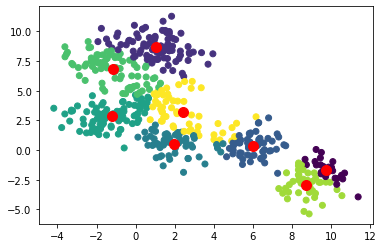

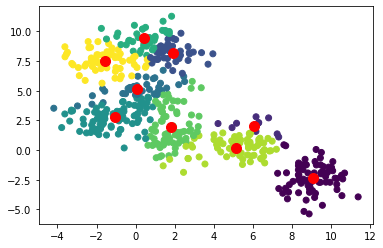

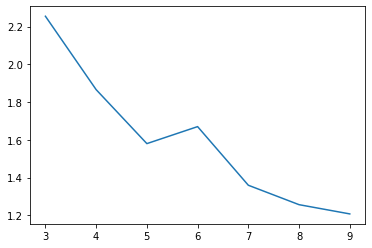

In [14]:

set_k(df)

## Kmeans execution

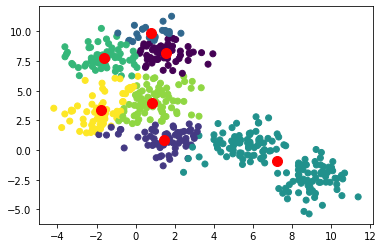

(            X          Y  centroid
 0    6.446428  -0.763598         3
 1   -1.252388   2.026967         6
 2    8.331701  -1.667423         3
 3    8.902551  -3.276785         3
 4    1.406025  10.851558         2
 ..        ...        ...       ...
 495  8.355250  -2.078673         3
 496  9.237487   0.049576         3
 497 -0.066877   7.203556         4
 498  0.423011   8.945041         0
 499 -0.476850   8.864899         4
 
 [500 rows x 3 columns],
 [[1.555252198449539, 8.138817448415109],
  [1.4660929374595544, 0.888026942373871],
  [0.8013134669669796, 9.888898321366394],
  [7.220282810933335, -0.9073344618866418],
  [-1.5956605929410488, 7.788959716357797],
  [0.8395854772914711, 3.983484334143465],
  [-1.760680535038333, 3.402838214625918]])

In [15]:
centroid_history = {}
kmeans(7, df, centroid_history)